# Cheat Sheet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# No np.linalg.norm
# No np.linalg.lstsq

### K-means clustering  - 2D for 2 means, 5 iterations

In [ ]:
df = pd.DataFrame() # Unclassified DataFrame with an x1 and x2 column

x1 = df['x1'] # Extract columns as vars (not strictly necessary)
x2 = df['x2']

mean_1 = np.array([-1, -1]) # Input starting means, add other means here for larger K
mean_2 = np.array([2, 1])


def distance(x1, x2, target): # Vectorised distance between a list of points (separated into x1 and x2) and a target point
    return np.sqrt((x1-target[0])**2 + (x2-target[1])**2) # L2 norm

for _ in range(5): # Change here for more iterations
    df["class"] = np.where(distance(x1, x2, mean_1) < distance(x1, x2, mean_2), 1, 2) # Vectorised class column creation based on minimum distance to means
    c1_df = df[df["class"] == 1] # DF with class 1 points only
    c2_df = df[df["class"] == 2] # DF with class 2 points only

    mean_1 = np.array([c1_df["x1"].mean(), c1_df["x2"].mean()]) # Update starting means with the average point of each class
    mean_2 = np.array([c2_df["x1"].mean(), c2_df["x2"].mean()])

    x1_mean = np.array([mean_1[0], mean_2[0]]) # Get separate arrays of x1 and x2 points of the means for plotting
    x2_mean = np.array([mean_1[1], mean_2[1]]) 

    plt.scatter(x1, x2, c=df["class"]) # Scatter plot coloured by class
    plt.scatter(x1_mean, x2_mean, color="red") # Plot means
    plt.show()
    print(f"{mean_1=}, {mean_2=}") # Print means



### Bayesian statistics - means and covariance matrices for 2 classes

In [ ]:
df = pd.DataFrame() # Classified DataFrame with an x1 and x2 column, along with a y column for classes

df1 = df[df["y"]==1] # DF with class 1 points only
df2 = df[df["y"]==2]

mean1 = np.array([df1["x1"].mean(), df1["x2"].mean()]) # Calculate means of each class
mean2 = np.array([df2["x1"].mean(), df2["x2"].mean()])

std1x1 = np.std(df1["x1"]) # Calculate standard deviations of x1 and x2 for each class
std1x2 = np.std(df1["x2"]) # NB use np.std not pd.std for unbiased estimator
std2x1 = np.std(df2["x1"])
std2x2 = np.std(df2["x2"])

covar1 = np.array([[std1x1**2, 0], # Covariance matrix in the form [[var1, covar], [covar, var2]]
                  [0, std1x2**2]])
covar2 = np.array([[std2x1**2, 0], 
                  [0, std2x2**2]])

### Bayesian statistics - visualising the probability data belongs to class 2 rather than class 1

In [ ]:
# Given functions

#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation, = Xgrid
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

grid, x1line, x2line = gen_sample_grid(200, 200, 2.5) # Change to represent the range of the data and number of points

px_w1 = prob_density_2d(grid, mean1[0], mean1[1], covar1) # Likelihood of class 1 - probability distribution of an observation given its class
px_w2 = prob_density_2d(grid, mean2[0], mean2[1], covar2)

pw1 = len(df1["x1"]) / len(df["x1"]) # Prior of class 1 - probability of a class before an observation has occurred
pw2 = len(df2["x1"]) / len(df["x1"]) 

px = px_w1 * pw1 + px_w2 * pw2 # Evidence - scaling term

pw1_x = px_w1 * pw1 / px # Posterior of class 1 - probability of an observation belonging to a class after being observed
pw2_x = px_w2 * pw2 / px

pw2_x = pw2_x.reshape(200, 200) # Reshape to 2D with same dimensions as the original grid
prediction = np.where(pw1_x > pw2_x, 1, 2).reshape(200, 200) # Predicted class based on posterior probabilities (useful but not used in this question)
plt.contourf(x1line, x2line, pw2_x) # Contour plot of the posterior probability of class 2
plt.colorbar()
plt.scatter(x1, x2, c=df["y"]) # Scatter plot coloured by true class
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

### Regression - 3 parameter linear regression

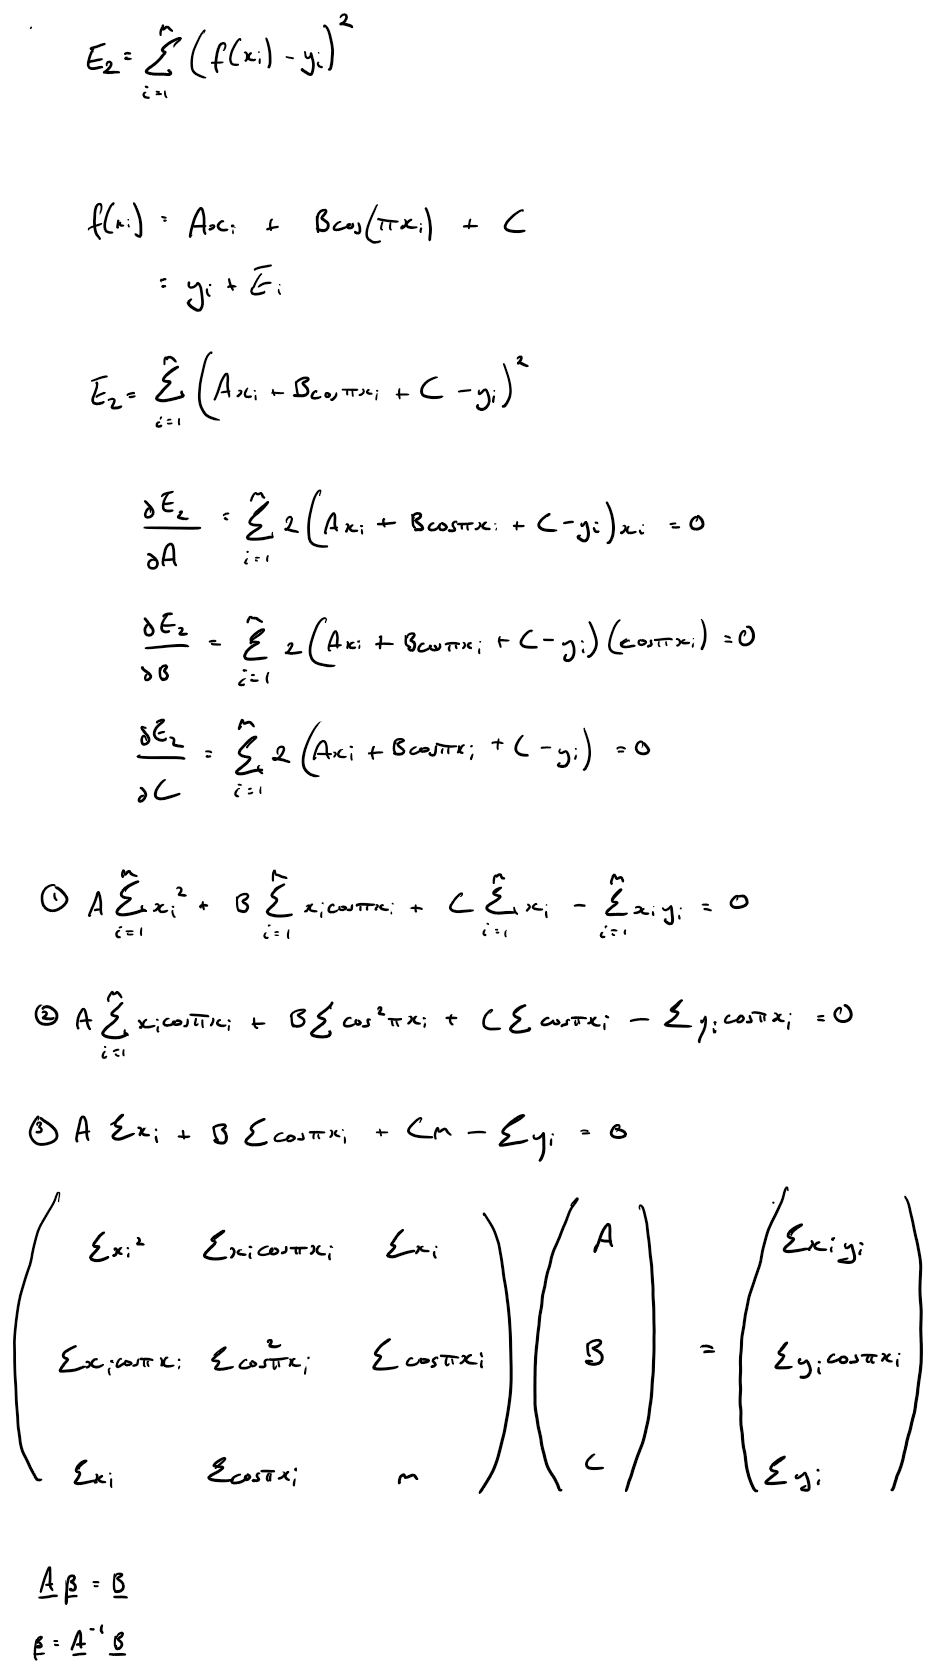

In [ ]:
df = pd.DataFrame() # DataFrame with an x and y column for continuous data

x = df['x']
y = df['y']

plt.scatter(x, y) # Scatter plot of the data

m = len(x)
xrange = np.linspace(-3, 3, m) # Range of x values

def f(x, A, B, C): # Function to fit with unknown parameters
    return A * x + B * np.cos(np.pi * x) + C

sx = np.sum(x) # See working for the following calculations
sx2 = np.sum(x**2)
scos = np.sum(np.cos(np.pi * x))
sxcos = np.sum(x * np.cos(np.pi * x))
scos2 = np.sum(np.cos(np.pi * x)**2)
sxy = np.sum(x * y)
sycos = np.sum(y * np.cos(np.pi * x))
sy = np.sum(y)

A_mat = np.array([[sx2, sxcos, sx], [sxcos, scos2, scos], [sx, scos, m]]) # 3x3 matrix 
B_mat = np.array([[sxy, sycos, sy]]).T # 3x1 matrix

A, B, C = np.linalg.solve(A_mat, B_mat) # Solve for constants and unpack
print(A, B, C)

plt.plot(xrange, f(xrange, A, B, C), color="red") # Plot the fitted function in red

### SVM - 2 parameter 2 class hard boundary

In [ ]:
a1 = np.array([0, 0]) # Class 1 support vectors
a2 = np.array([0.4, 1])
b1 = np.array([1, 0]) # Class 2 support vector

vector = a2 - a1 # Calculate the vector between the two support vectors from the same class (gradient same as hyperplane)
m = vector[1] / vector[0] # Gradient of hyperplane (y/x)

p0 = 0.5 * (a1 + b1) # Midpoint between any class 1 and class 2 support vector (point on hyperplane)

c = p0[1] - m * p0[0] # Solve y = mx + c for c

print(f"y = {m}x + {c}")

xrange = np.linspace(-2, 2, 100)
plt.scatter([a1[0], a2[0]], [a1[1], a2[1]], color="red") # Plot support vectors and hyperplane
plt.scatter(b1[0], b1[1], color="blue")  
plt.plot(xrange, m * xrange + c, color="green")